In [1]:
# Import generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
# Import AudioSegment and play
from pydub import AudioSegment

AudioSegment.converter = "Downloads/ffmpeg"
AudioSegment.ffmpeg = "Downloads/ffmpeg"
AudioSegment.ffprobe ="Downloads/ffprobe"

from pydub.playback import play

# Create an AudioSegment instance
raw_file = AudioSegment.from_file(file="Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.ogg", format="ogg")

# Check the type
print(type(raw_file))

<class 'pydub.audio_segment.AudioSegment'>


In [3]:
# Export the .mp3 file as wav
raw_file.export(out_f="Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav",
                format="wav")

<_io.BufferedRandom name='Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav'>

In [4]:
wav_file = AudioSegment.from_file(file="Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav", format="wav")

# Play the audio file
play(wav_file)

# General Audio Features Explorations

## Amplitude

In [5]:
import librosa
import librosa.display

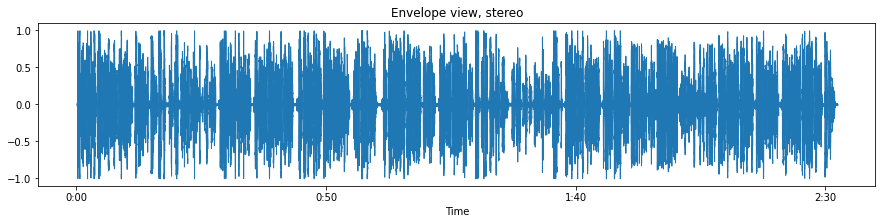

In [6]:
y, sr = librosa.load('Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav', mono=False)

fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.waveshow(y, sr=sr, ax=ax)

ax.set(title='Envelope view, stereo')
ax.label_outer()

plt.show()

## Frequency

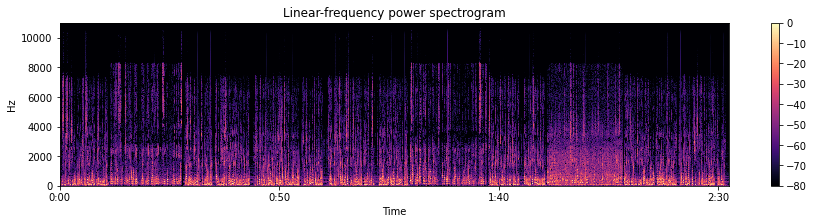

In [7]:
# Load audio file to Librosa
y, sr = librosa.load('Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav')

# Converts data into short term Fourier transform. 
# STFT converts signals such that we can know the amplitude of the given frequency at a given time
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display spectogram
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()

plt.colorbar()

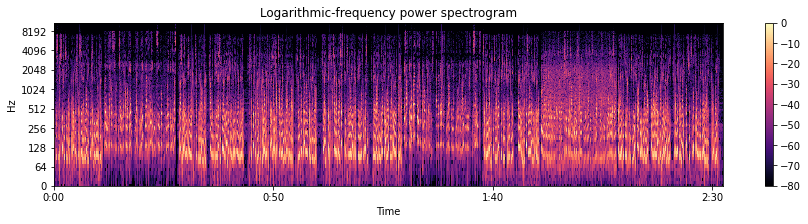

In [8]:
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
ax.set(title='Logarithmic-frequency power spectrogram')
ax.label_outer()

plt.colorbar()

# Speech Analysis

## Recognition

In [35]:
import speech_recognition as sr

# Set up recognizer
r = sr.Recognizer()
r.energy_threshold = 300

# Import Audio data
test_audio = sr.AudioFile('Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav')
with test_audio as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source)
    
r.recognize_google(audio, show_all=True)

{'alternative': [{'transcript': "bladder says any referee mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology and wealth but driver said the current system could not be changed during the World Cup which is currently approaching the quarter-finals in South Africa blotter witness both officiating mistake Sunday during the round of 16 matches between England and Germany and between Argentina and Mexico in the first match England's Frank Lampard would have tied the score at 2-all before half-time but officials did not see his shot bounced across the goal line and rebound out after hitting under the crossbar the score remained at 21 and Germany went on to win 4-1 to advance to the quarterfinals in the second game officials missed a clear offside against Argentina's refereeing or match control",
   'confidence': 0.71217394},
  {'transcript': "bladder says any referee mistakes are d

In [26]:
# Import Audio data

test_audio2 = sr.AudioFile('Downloads/2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav')
with test_audio2 as source2:
    audio2 = r.record(source2, duration=60)
    audio3 = r.record(source2, duration=60)
    audio4 = r.record(source2)

In [36]:
text_audio = r.recognize_google(audio2) + " " + r.recognize_google(audio3) + " " + r.recognize_google(audio4)
text_audio

"FIFA president Sepp blatter says any referee mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology during the World Cup which is currently approaching the quarter-finals in South Africa brought her witness both officiating mistake Sunday during the round of 16 matches between England and Germany and between Argentina and Mexico in the first match England's Frank Lampard would have tied the score at 2 all before half-time but officials did not see his shot bounced across the goal line and rebound out after hitting under the crossbar the score remained at 21 and Germany went on to win 4-1 to advance to the quarterfinals in the second game officials Mystic clear offside against Argentina's capital status whose header gave his team in early one nearly over Mexico the argentines 131 and also Advanced blatter said he apologized to England in Mexico and its fever was already studying 

## Add punctuator

In [37]:
from punctuator import Punctuator

p = Punctuator('Downloads/INTERSPEECH-T-BRNN.pcl')
# https://drive.google.com/drive/folders/0B7BsN5f2F1fZQnFsbzJ3TWxxMms?resourcekey=0-6yhuY9FOeITBBWWNdyG2aw
# https://pypi.org/project/punctuator/

In [44]:
text_audio_punc = p.punctuate(text_audio)
text_audio_punc

"Fifa, president Sepp blatter says, any referee mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology during the World Cup, which is currently approaching the quarter-finals in South Africa brought her witness. Both officiating mistake Sunday during the round of 16 matches between England and Germany and between Argentina and Mexico in the first match England's Frank Lampard would have tied the score at 2 all before half-time, but officials did not see his shot bounced across the goal line and rebound out after hitting under the crossbar. The score remained at 21 and Germany went on to win 4-1 to advance to the quarterfinals in the second game officials, Mystic, clear, offside against Argentina's capital status, whose header gave his team in early one nearly over Mexico, the argentines 131. And also Advanced blatter said, he apologized to England in Mexico and its fever was alre

## Recognition on non-English language

In [39]:
raw_file = AudioSegment.from_file(file="Downloads/Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.ogg", format="ogg")
raw_file.export(out_f="Downloads/Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.wav", format="wav")

wav_file = AudioSegment.from_file(file="Downloads/Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.wav", format="wav")

In [40]:
# Set up recognizer
r = sr.Recognizer()
r.energy_threshold = 300

# Import Audio data
test_audio = sr.AudioFile('Downloads/Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.wav')
with test_audio as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source)
    
r.recognize_google(audio, language="id-ID", show_all=True)

{'alternative': [{'transcript': 'karena begitu besar kasih Allah akan dunia ini sehingga Ia telah mengaruniakan anaknya yang tunggal supaya setiap orang yang percaya kepadaNya tidak binasa melainkan beroleh hidup yang kekal',
   'confidence': 0.96728694}],
 'final': True}

In [43]:
text_audio_id = r.recognize_google(audio, language="id-ID")
text_audio_id

'karena begitu besar kasih Allah akan dunia ini sehingga Ia telah mengaruniakan anaknya yang tunggal supaya setiap orang yang percaya kepadaNya tidak binasa melainkan beroleh hidup yang kekal'

## Natural Language Processing

### Sentiment Analysis using VADER

In [41]:
import nltk
nltk.download("punkt")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /Users/oliviatan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/oliviatan/nltk_data...


True

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [45]:
print(sid.polarity_scores(text_audio_punc))

{'neg': 0.032, 'neu': 0.866, 'pos': 0.102, 'compound': 0.969}


In [46]:
print(sid.polarity_scores(text_audio_id))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


### Named-entity recognition using spaCy

In [48]:
import spacy

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

In [49]:
doc = nlp(text_audio_punc)

# Find named entities in doc
for entity in doc.ents:
    print(entity.text, entity.label_)

Sepp PERSON
the International Football Association ORG
the World Cup EVENT
South Africa GPE
Sunday DATE
16 CARDINAL
England GPE
Germany GPE
Argentina GPE
Mexico GPE
first ORDINAL
England GPE
Frank Lampard PERSON
2 CARDINAL
21 DATE
Germany GPE
4 CARDINAL
second ORDINAL
Mystic GPE
Argentina GPE
Mexico GPE
131 CARDINAL
Advanced PERSON
England GPE
Mexico GPE
Howard Webb PERSON
years DATE
12-hour TIME
one CARDINAL
Scott Bob PERSON
